In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix  

In [34]:
df=pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [37]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [38]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

C:\Users\meena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


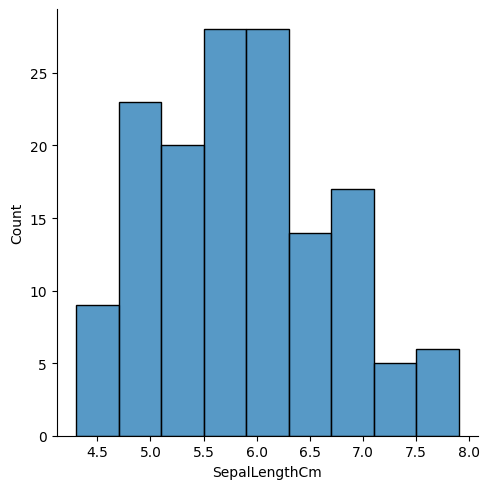

In [39]:
sns.displot(df['SepalLengthCm'])

C:\Users\meena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


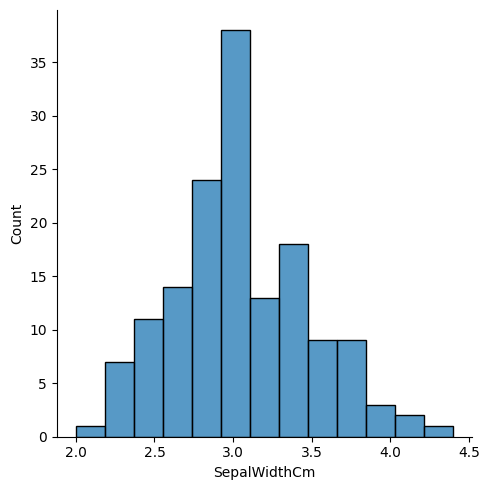

In [40]:
sns.displot(df['SepalWidthCm'])

C:\Users\meena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


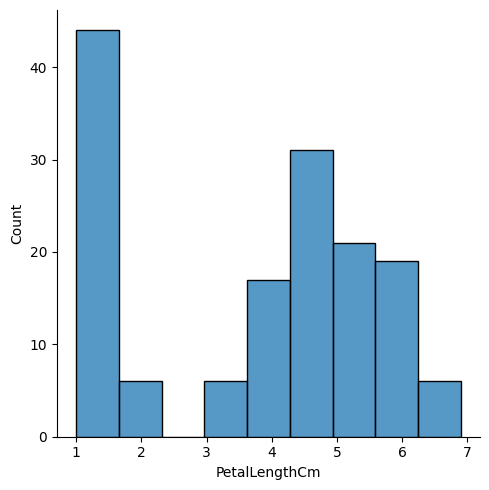

In [41]:
sns.displot(df['PetalLengthCm'])

C:\Users\meena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


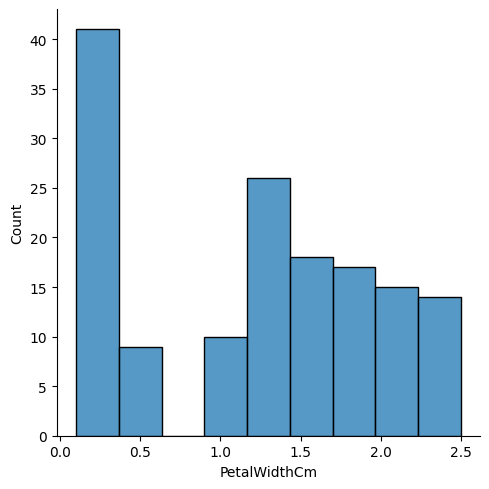

In [42]:
sns.displot(df['PetalWidthCm'])

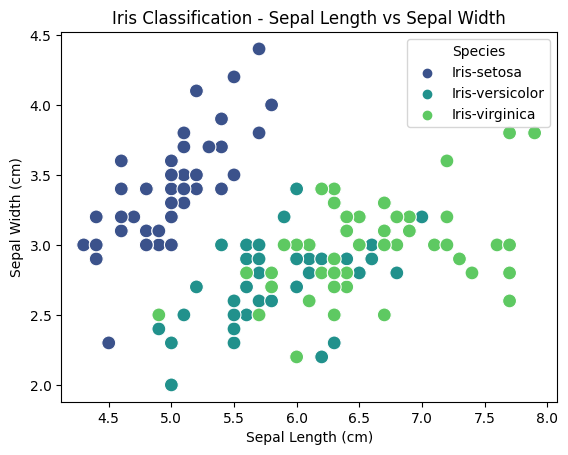

In [44]:
scatter_plot = sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, palette="viridis", s=100)
plt.title("Iris Classification - Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
scatter_plot.legend(title='Species')

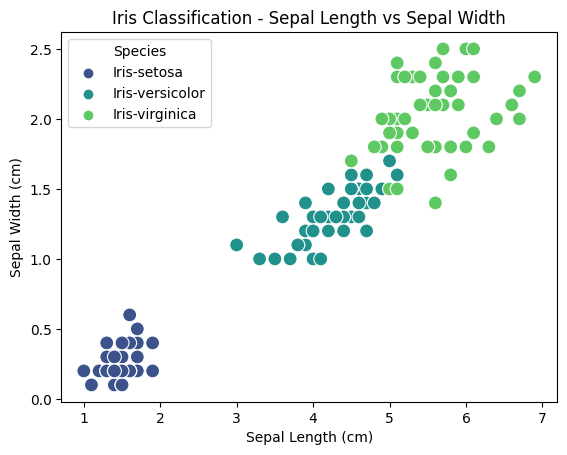

In [45]:
scatter_plot = sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df, palette="viridis", s=100)
plt.title("Iris Classification - Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
scatter_plot.legend(title='Species')

In [49]:
label=LabelEncoder()
df['Species_n']=label.fit_transform(df['Species'])
class_names = df['Species'].unique()
encoded_labels = df['Species_n'].unique()

for class_name, encoded_label in zip(class_names, encoded_labels):
    print(f"{class_name} is encoded as {encoded_label}")

Iris-setosa is encoded as 0
Iris-versicolor is encoded as 1
Iris-virginica is encoded as 2


In [51]:
df.drop(['Species'],axis=1,inplace=True)
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_n
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [54]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape)
print(y.shape)

(150, 5)
(150,)


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [76]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred_model1=model1.predict(x_test)

C:\Users\meena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
svm=SVC()
param_grid = {
    'C': [i for i in range(1,15)],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
model2=GridSearchCV(svm,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
model2.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [78]:
print(model2.best_estimator_)
print(model2.best_params_)
print(model2.best_score_)

SVC(C=1, kernel='linear')
{'C': 1, 'kernel': 'linear'}
1.0


In [79]:
y_pred_model2=model2.predict(x_test)

In [80]:
decision_tree=DecisionTreeClassifier()
param_grid={
  'criterion':['gini','entropy'],
  'max_depth':[None]+[i for i in range(5,25,5)],
  'min_samples_split':[i for i in range(2,15)],
  'min_samples_leaf':[i for i in range(1,10)],
  'max_features':[None,'log2','sqrt']
}
model3=GridSearchCV(estimator=decision_tree,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
model3.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14]},
             scoring='accuracy')

In [81]:
print(model3.best_estimator_)
print(model3.best_params_)
print(model3.best_score_)

DecisionTreeClassifier(max_features='log2')
{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
1.0


In [82]:
y_pred_model3=model3.predict(x_test)

In [83]:
print("model 1 performance")
print("accuracy:",accuracy_score(y_test,y_pred_model1))
print("classification report:\n",classification_report(y_test,y_pred_model1))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_model1))

model 1 performance
accuracy: 1.0
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

confusion matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [84]:
print("model 2 performance")
print("accuracy:",accuracy_score(y_test,y_pred_model2))
print("classification_report:\n",classification_report(y_test,y_pred_model2))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred_model2))

model 2 performance
accuracy: 1.0
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

confusion_matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [85]:
print("model 3 performance")
print("accuracy",accuracy_score(y_test,y_pred_model3))
print("classification report:\n",classification_report(y_test,y_pred_model3))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred_model3))

model 3 performance
accuracy 1.0
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

confusion_matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
